In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]

# Task 1

In [11]:
b_img= np.zeros((300,300), dtype=np.uint8)
b_img[100:200,100:200]=255

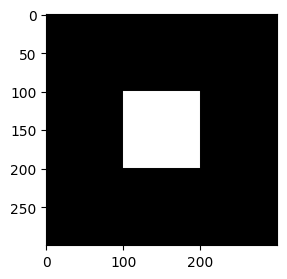

In [32]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
displayImage(b_img)

# Task 2 

In [26]:
#loading all 3 images
img1=cv2.imread('./Task-assets/concat1.jpg',0)
img2=cv2.imread('./Task-assets/concat2.jpg',0)
img3=cv2.imread('./Task-assets/concat3.jpg',0)

In [28]:
#displaying all 3 images separately at the same time
cv2.imshow("1", img1)
cv2.imshow("2", img2)
cv2.imshow("3", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

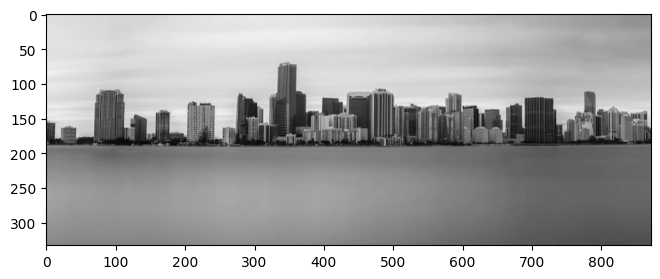

In [33]:
#Concatenating images in order and displaying new image
newimg=np.concatenate((img1,img2,img3),axis=1)
displayImage(newimg)

# Task 3

In [83]:
#defining function for displaying 2 images 
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

In [84]:
#img = cv2.imread('./Task-assets/threshold.jpg')

In [86]:
threshold=109 #set threshold value
Timg = np.array('./Task-assets/threshold.jpg') #convert image into array
Timg = np.where(Timg >threshold, 255, 0) #converting np array into 0 or 1 
displayImages(img, Timg)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.Int32DType'>) -> None